### Grad-CAM

* CNN의 내부를 열어볼 수 있는 도구 : Neural Net이 이미지의 어떤 부분을 보고 특정 Label로 예측을 하는지에 대해 알 수 있다.

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Display
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


* Pretrained Model : Xception

In [3]:
model_builder = keras.applications.xception.Xception
# 이제껏 Transfer Learning에서 사용한 것과 같이 모델을 불러온다.
model = model_builder(weights="imagenet")

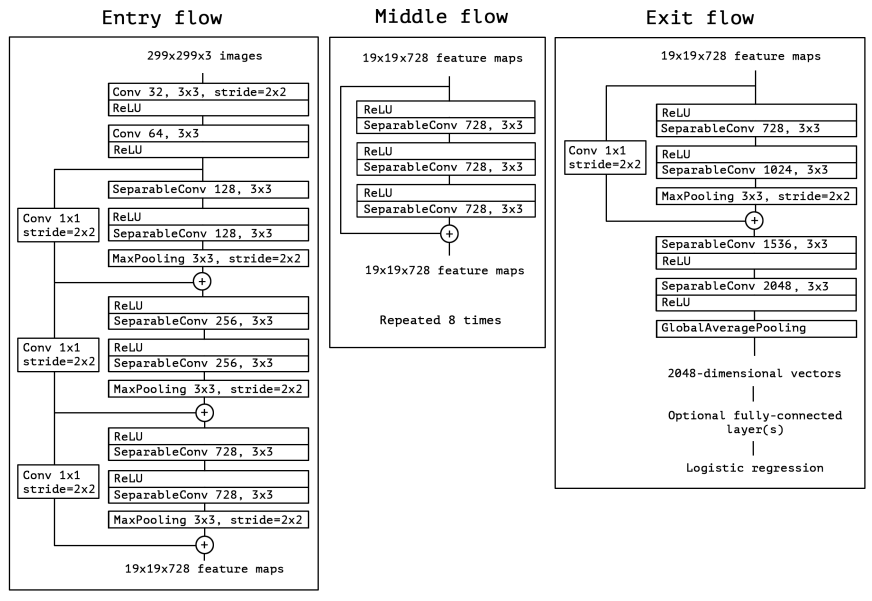

In [4]:
Image('/content/drive/MyDrive/CDS2(2022-2)/img/03/Xcep.png')

In [5]:
for layer in model.layers:
    print(layer.name)
    # 전체 layer 확인 → 우리는 가장 마지막 Conv 층의 layer를 사용할 것.

input_1
block1_conv1
block1_conv1_bn
block1_conv1_act
block1_conv2
block1_conv2_bn
block1_conv2_act
block2_sepconv1
block2_sepconv1_bn
block2_sepconv2_act
block2_sepconv2
block2_sepconv2_bn
conv2d
block2_pool
batch_normalization
add
block3_sepconv1_act
block3_sepconv1
block3_sepconv1_bn
block3_sepconv2_act
block3_sepconv2
block3_sepconv2_bn
conv2d_1
block3_pool
batch_normalization_1
add_1
block4_sepconv1_act
block4_sepconv1
block4_sepconv1_bn
block4_sepconv2_act
block4_sepconv2
block4_sepconv2_bn
conv2d_2
block4_pool
batch_normalization_2
add_2
block5_sepconv1_act
block5_sepconv1
block5_sepconv1_bn
block5_sepconv2_act
block5_sepconv2
block5_sepconv2_bn
block5_sepconv3_act
block5_sepconv3
block5_sepconv3_bn
add_3
block6_sepconv1_act
block6_sepconv1
block6_sepconv1_bn
block6_sepconv2_act
block6_sepconv2
block6_sepconv2_bn
block6_sepconv3_act
block6_sepconv3
block6_sepconv3_bn
add_4
block7_sepconv1_act
block7_sepconv1
block7_sepconv1_bn
block7_sepconv2_act
block7_sepconv2
block7_sepconv2_

* Image Load

In [6]:
img_size = (299, 299)
preprocess_input = keras.applications.xception.preprocess_input
# 이미지 형식을 자동으로 맞춰줌. preprocessed numpy.array or a tf.Tensor with type float32
decode_predictions = keras.applications.xception.decode_predictions
# xception의 prediction (class_name, class_description, score)

* GAP

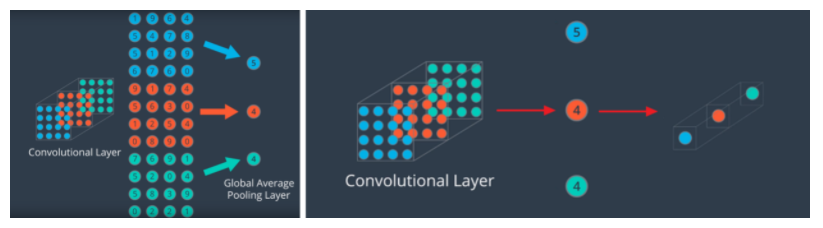

In [7]:
Image('/content/drive/MyDrive/CDS2(2022-2)/img/02/gap.png')

In [8]:
last_conv_layer_name = "block14_sepconv2_act"
# avg_pool 이전의 layer

In [9]:
img_path = keras.utils.get_file(
    "african_elephant.jpg", "https://i.imgur.com/Bvro0YD.png"
)
# keras에 저장되어있는 임의의 이미지

In [10]:
Image(img_path)

Output hidden; open in https://colab.research.google.com to view.

* Image Preprocessing

In [11]:
def get_img_array(img_path, size):
    img = keras.preprocessing.image.load_img(img_path, target_size=size) # img_size = (299, 299)
    # 입력한 이미지를 정해진 사이즈로 변경 299x299
    array = keras.preprocessing.image.img_to_array(img)
    # np.array
    array = np.expand_dims(array, axis=0)
    # 한장의 이미지도 batch로 입력해야하기에 (1, 299, 299, 3)으로 차원 변경
    return array

* Heatmap

In [12]:
grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )
# 모델 정의 : input, last_conv_layer_name라는 이름의 feature가져오기, model_output

In [13]:
img_array = get_img_array(img_path, size=img_size)
# 위에서 준비한 코끼리 이미지를 모델의 input에 맞춰준다.

In [14]:
grad_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 149, 149, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                             

In [15]:
last_conv_layer_output, preds = grad_model(img_array)
# 코끼리 이미지를 모델에 입력 -> last_conv_output과 output 두개가 출력으로 나온다.

In [16]:
last_conv_layer_output[0]
# last conv의 feature map

<tf.Tensor: shape=(10, 10, 2048), dtype=float32, numpy=
array([[[  0.        ,  32.739697  ,  31.199335  , ...,   0.        ,
          36.5155    ,   0.        ],
        [  0.        ,  37.3972    ,  55.86282   , ...,   0.        ,
          53.693947  ,   0.        ],
        [  0.        ,  15.936402  ,  50.4368    , ...,   0.        ,
          53.3912    ,   0.        ],
        ...,
        [  0.        ,   0.        ,  14.636938  , ...,   0.        ,
           0.        ,   0.        ],
        [  0.        ,   0.        ,  13.892162  , ...,   0.        ,
           7.5537114 ,   0.        ],
        [  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.66504204,   0.        ]],

       [[  0.        ,  40.749847  ,  61.127438  , ...,   0.        ,
          54.421112  ,   0.        ],
        [  0.        ,  44.020576  , 108.136856  , ...,   0.        ,
          88.54156   ,   0.        ],
        [  0.        ,   4.3372483 , 121.58193   , ...,   0.     

* pred에서 가장 큰 값을 뽑는 과정

In [17]:
preds

<tf.Tensor: shape=(1, 1000), dtype=float32, numpy=
array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 3.00854302e-34, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.000

In [18]:
preds.shape
# 각각의 class 예측값

TensorShape([1, 1000])

In [19]:
pred_index = tf.argmax(preds[0])

In [20]:
pred_index

<tf.Tensor: shape=(), dtype=int64, numpy=659>

In [21]:
class_channel = preds[:, pred_index]

In [22]:
class_channel

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.99982685], dtype=float32)>

In [23]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
  # 이미지, 모델, 마지막 layer(cnn filter 사용), 이미지안에서도 어떤 객체를 볼것인지 index

    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )
    # input으로 하나 들어가서, 하나는 마지막 cnn의 feature map출력으로 하나는 model.output출력으로 나오기


    # customize한 fit 방법 
    with tf.GradientTape() as tape:
      # fit으로 학습하듯이 GD를 활용해서 BG을 하겠다는 의미
        last_conv_layer_output, preds = grad_model(img_array)
        # model을 통해서 위에서 정의한데로 두개의 output받기 : cnn_output, 최종 output

        if pred_index is None:
            pred_index = tf.argmax(preds[0])
            # 가장 예측값이 큰 값
        class_channel = preds[:, pred_index]
        # class 예측

    grads = tape.gradient(class_channel, last_conv_layer_output)
    # 가장 예측 값이 높은 class와 last conv layer의 gradient 계산

    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    # feature map channel 별로 평균

    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis] # expand_dims와 동일
    # last_conv_layer_output에 gradient를 곱한다.(broadcast)
    # 차원을 동일하게 맞추고 곱하기 위해서 pooled_grads에 차원 추가

    # 그러면, class를 예측하기 위해서 feature map이 어떤 부분을 주의해서 보았는지 알수있음

    heatmap = tf.squeeze(heatmap)
    # 이후 다시 차원 없애기

    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    # 0보다 작으면 0으로 되게 조정/ 텐서 차원에서의 max 값 = Normalize
    return heatmap.numpy()

Predicted: [('n02504458', 'African_elephant', 9.862387)]


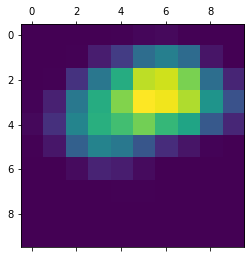

In [24]:
img_array = preprocess_input(get_img_array(img_path, size=img_size))
# 위에서 준비한 코끼리 이미지

model.layers[-1].activation = None
# 마지막 softmax 출력층을 None

preds = model.predict(img_array)
# 이미지를 입력하였을때 예측 값

print("Predicted:", decode_predictions(preds, top=1)[0])
# feature map을 다시 decode : (class_name, class_description, score)

heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)
# 이미지, model, last_conv_layer_name을 입력하여 heatmap을 구한다.

# Display heatmap
plt.matshow(heatmap)
plt.show()
# 이러한 heatmap이 나온다.

* Grad Cam 적용

In [25]:
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    img = keras.preprocessing.image.load_img(img_path)
    img = keras.preprocessing.image.img_to_array(img)
    # 입력한 이미지를 load

    heatmap = np.uint8(255 * heatmap)
    # heatmap의 값을 0~255로 조정

    jet = cm.get_cmap("jet")
    # jet colorize heatmap 사용

    jet_colors = jet(np.arange(256))[:, :3]
    # 0~255 3channel로 변경
    jet_heatmap = jet_colors[heatmap]
    # RGB로 사용

    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    # heatmap을 모델 input과 동일하게 변환
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    # 사이즈를 비교하고자 하는 img와 동일하게 조정 : 바로 위에 mapping하여 시각화 할 것이기에
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)
    # 사이즈를 조정하고 다시 preprocessing 정의

    superimposed_img = jet_heatmap * alpha + img
    # alpha만큼의 비율만(흐르기 조절로 간단하게 이해) img에 더하기
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)
    # array를 img로 변환

    superimposed_img.save(cam_path)
    # cam_path로 저장하고

    display(Image(cam_path))
    # 이미지 시각화 : cam_path로 불러오기

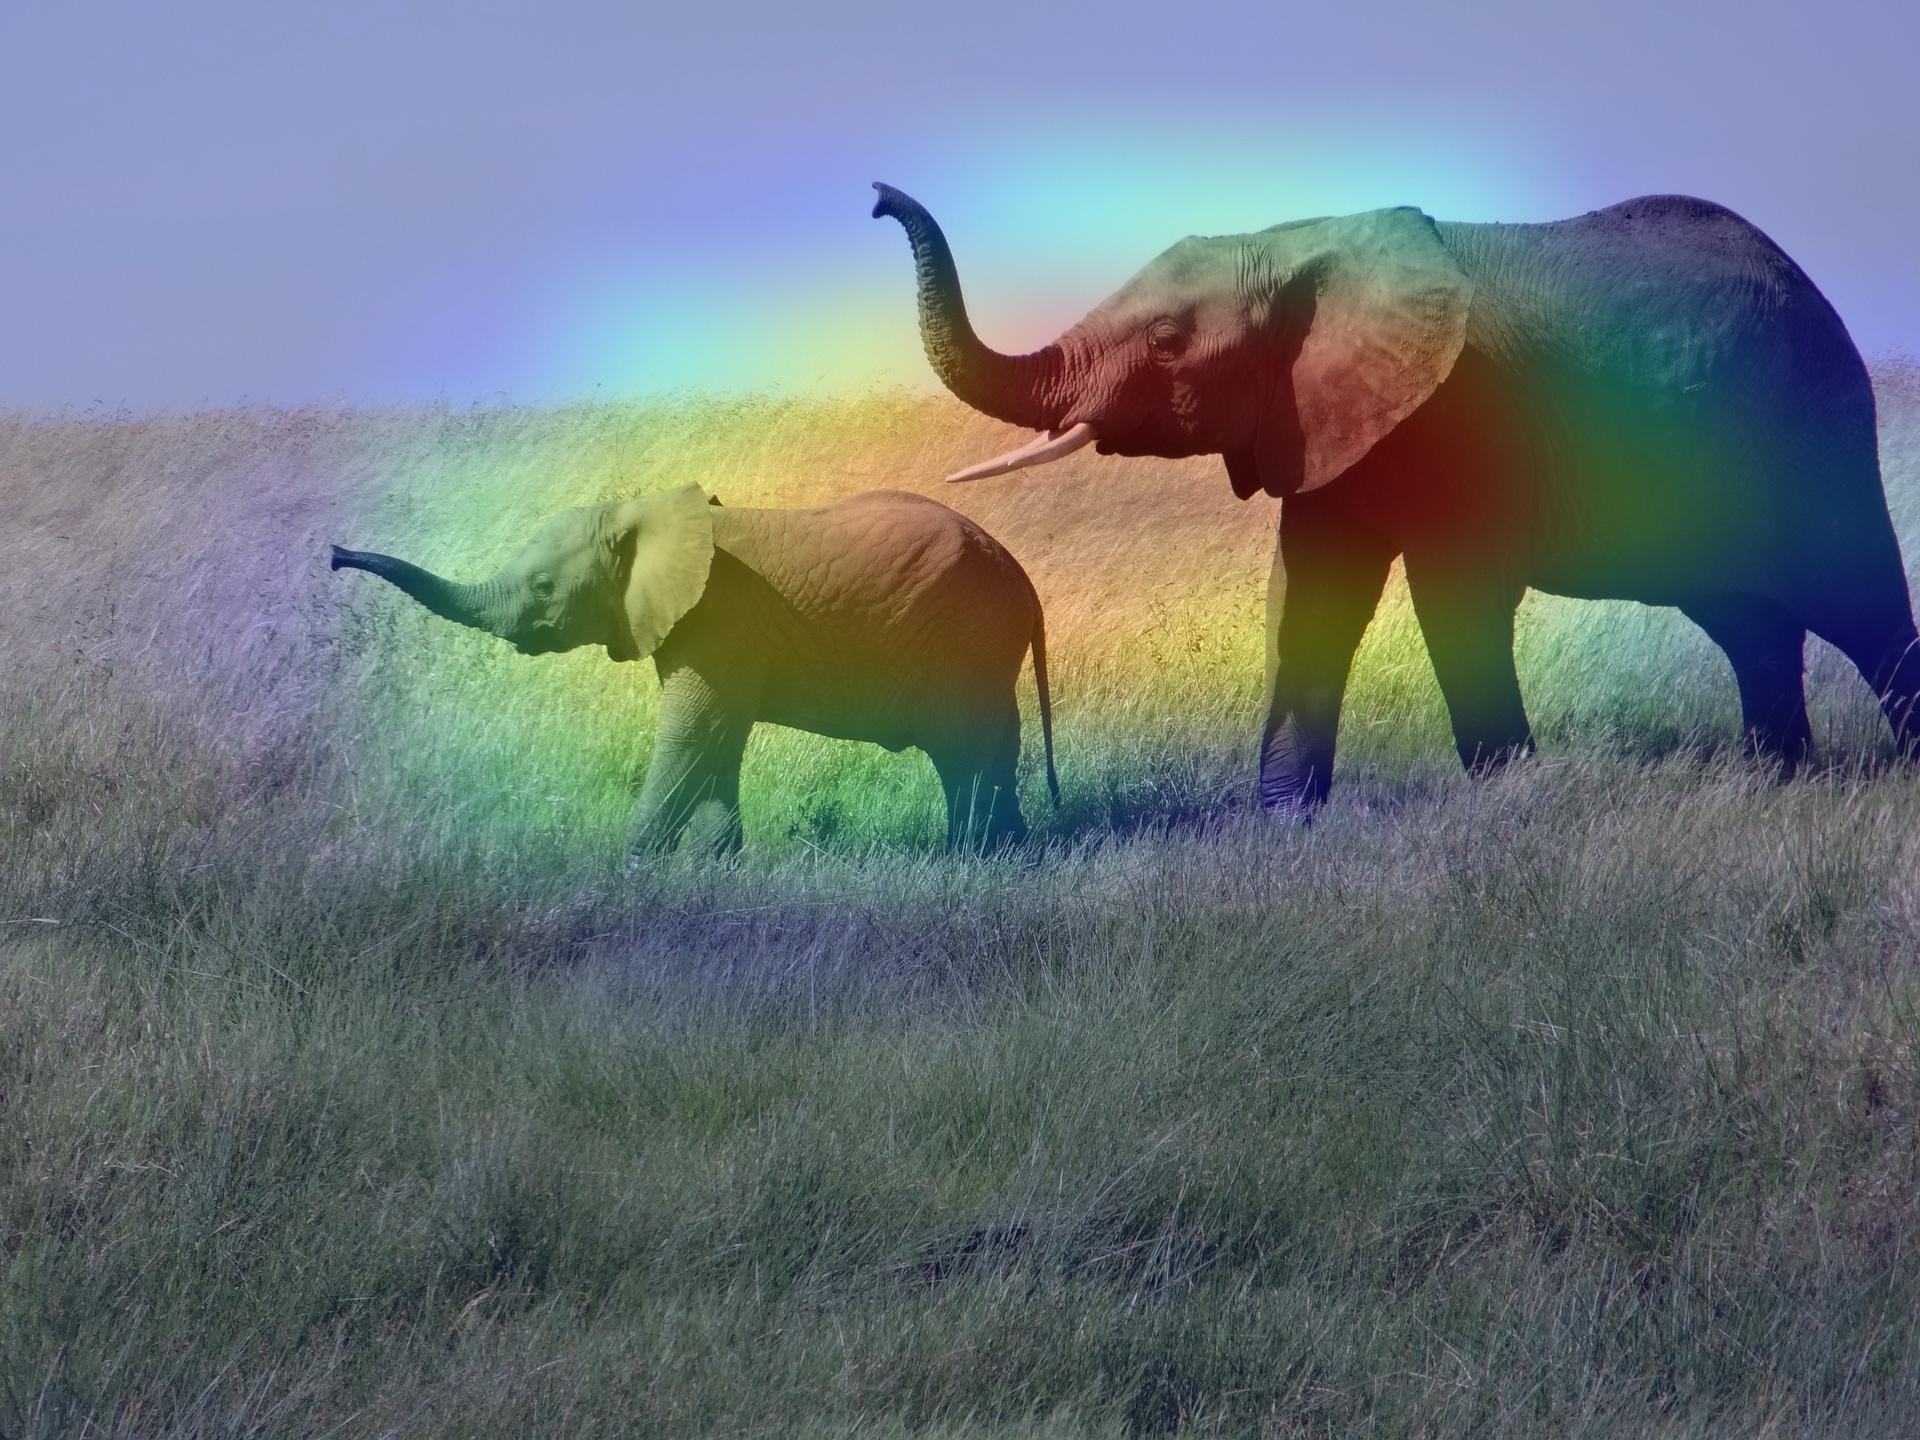

In [26]:
save_and_display_gradcam(img_path, heatmap)

* 다른 이미지에 적용

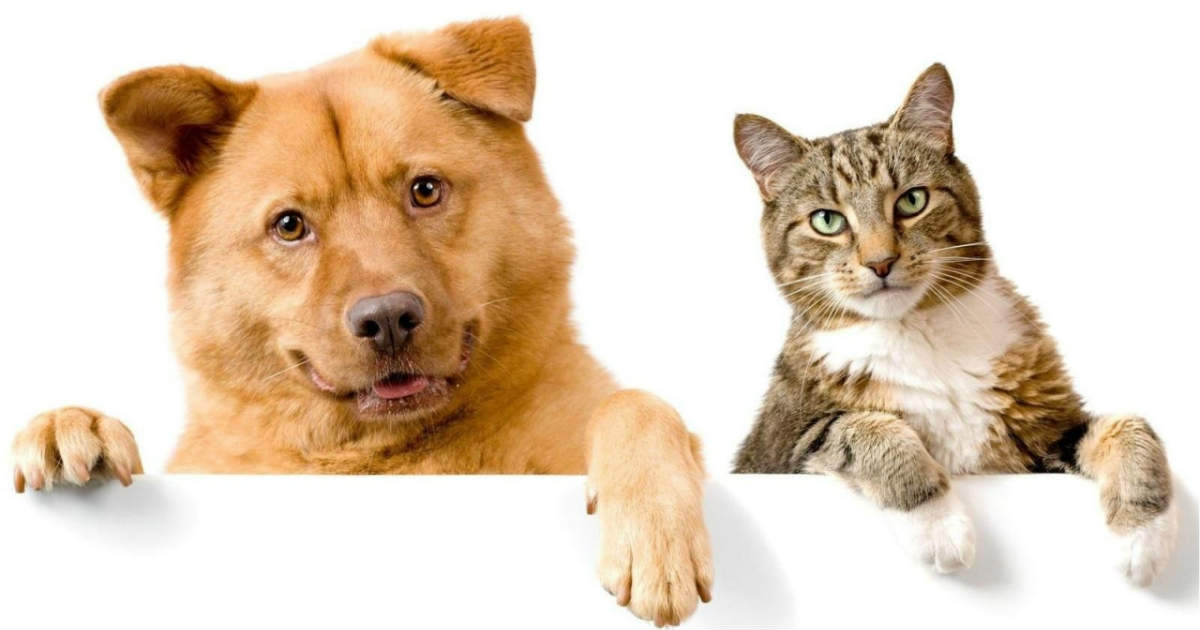

In [27]:
img_path = keras.utils.get_file(
    "cat_and_dog.jpg",
    "https://storage.googleapis.com/petbacker/images/blog/2017/dog-and-cat-cover.jpg",
)
# 새로운 이미지 불러오기

display(Image(img_path))
# 이미지 시각화

In [28]:
img_array = preprocess_input(get_img_array(img_path, size=img_size))
# 이미지 전처리

preds = model.predict(img_array)
# 이미지 예측
print("Predicted:", decode_predictions(preds, top=2)[0])

Predicted: [('n02112137', 'chow', 4.611239), ('n02124075', 'Egyptian_cat', 4.381738)]


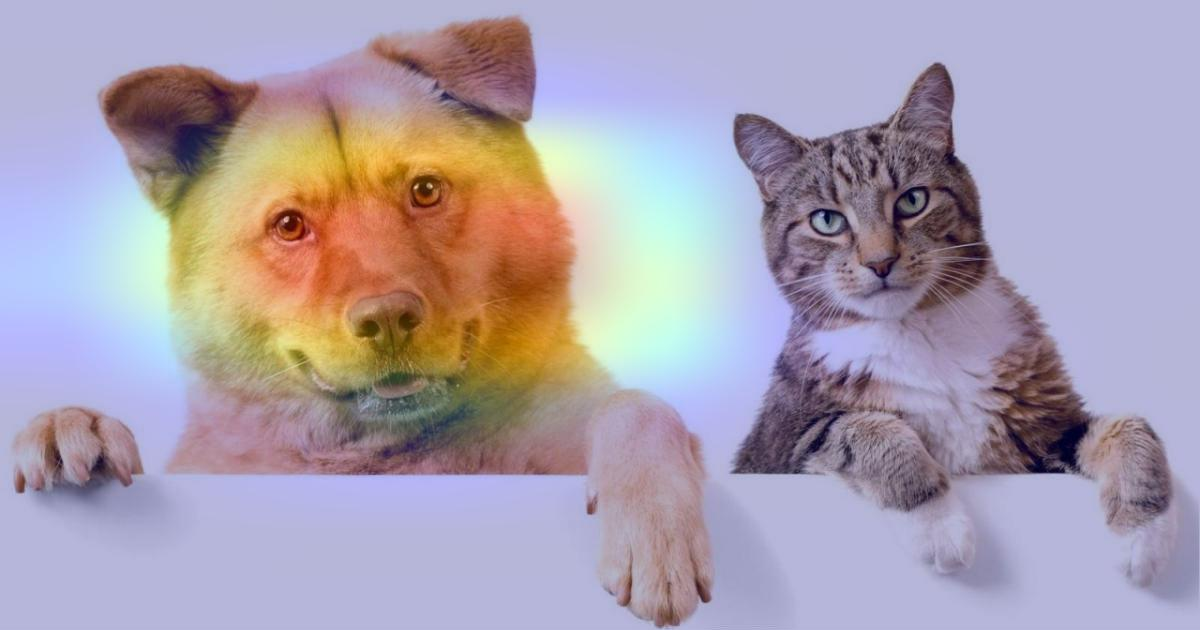

In [29]:
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=260)
# chow index=260
save_and_display_gradcam(img_path, heatmap)

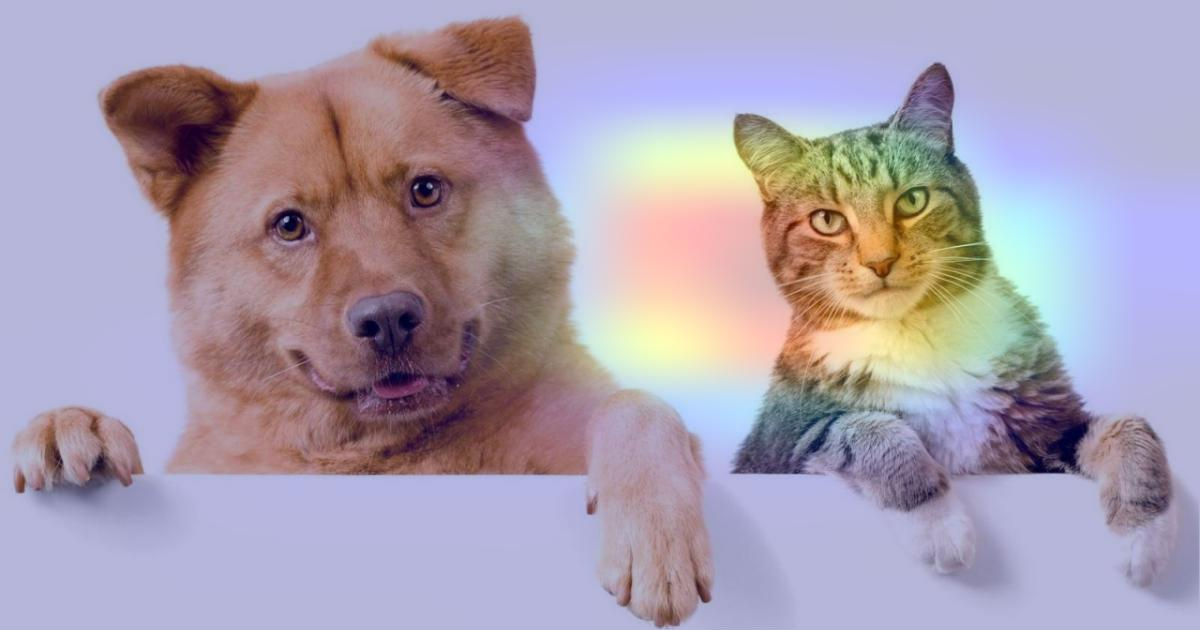

In [30]:
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=285)
# egyptian index=260
save_and_display_gradcam(img_path, heatmap)

* Custom Image 

In [31]:
import cv2

In [32]:
img_car = cv2.imread('/content/drive/MyDrive/CDS2(2022-2)/img/03/car.png')
img_car = cv2.cvtColor(img_car, cv2.COLOR_BGR2RGB)

* 웹에서 다운받은 임의의 이미지

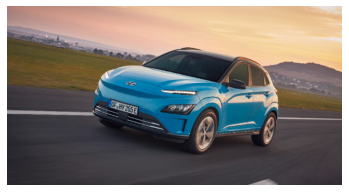

In [33]:
plt.imshow(img_car)
plt.axis("off")
plt.show()

In [34]:
def get_norm_img_array(img, size):
    img = cv2.resize(img, dsize=size)
    # 입력한 이미지를 정해진 사이즈로 변경 299x299
    array = keras.preprocessing.image.img_to_array(img)
    array = np.expand_dims(array, axis=0)
    # 한장의 이미지도 batch로 입력해야하기에 (1, 299, 299, 3)으로 차원 변경
    return array

* 위와 동일한 함수

In [35]:
def save_and_display_gradcam_norm(img, heatmap, cam_path="cam.jpg", alpha=0.4):
    img = keras.preprocessing.image.img_to_array(img)
    # 입력한 이미지를 load

    heatmap = np.uint8(255 * heatmap)
    # heatmap의 크기를 조정

    jet = cm.get_cmap("jet")
    # jet colorize heatmap 사용

    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]
    # RGB로 사용

    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    # image를 RGB
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    # 사이즈
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)
    # RGB + 사이즈 조정하여 다시 이미지 preprocessing 정의

    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)
    # aplph의 값을 곱하여 이미지를 더함.

    superimposed_img.save(cam_path)
    # 이미지 저장경로

    display(Image(cam_path))
    # 이미지 시각화

In [36]:
img_array = preprocess_input(get_norm_img_array(img_car, size=img_size))

In [37]:
preds = model.predict(img_array)
# 이미지 예측
print("Predicted:", decode_predictions(preds, top=1)[0])

Predicted: [('n04285008', 'sports_car', 8.370647)]


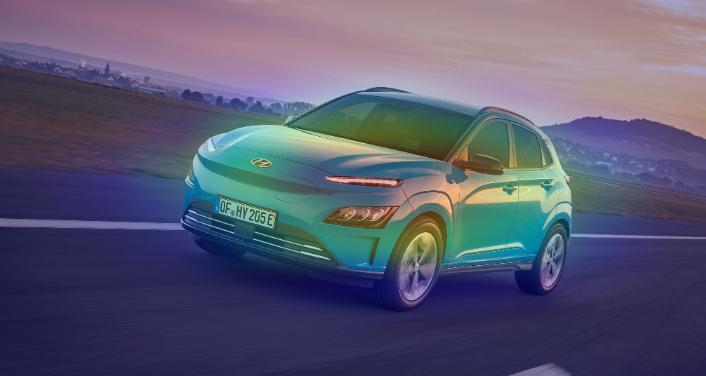

In [38]:
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)
# heatmap 뽑고
save_and_display_gradcam_norm(img_car, heatmap)
# 이미지 위에서 heatmap 시각화

In [39]:
img_moto = cv2.imread('/content/drive/MyDrive/CDS2(2022-2)/img/03/moto.png')
img_moto = cv2.cvtColor(img_moto, cv2.COLOR_BGR2RGB)

* 웹에서 다운받은 또 다른 이미지

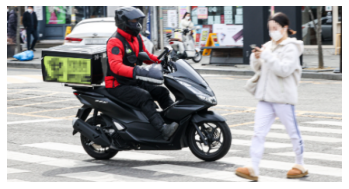

In [40]:
plt.imshow(img_moto)
plt.axis("off")
plt.show()

In [41]:
img_array = preprocess_input(get_norm_img_array(img_moto, size=img_size))
# 이미지 전처리

In [42]:
preds = model.predict(img_array)
# 이미지 예측
print("Predicted:", decode_predictions(preds, top=1)[0])

Predicted: [('n03791053', 'motor_scooter', 7.9310665)]


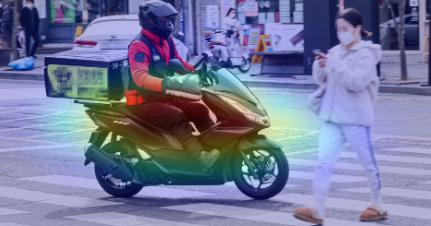

In [43]:
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)
# heatmap 구하기
save_and_display_gradcam_norm(img_moto, heatmap)
# 원본 이미지에 heatmep 더하기

In [44]:
img_str = cv2.imread('/content/drive/MyDrive/CDS2(2022-2)/img/03/str.png')
img_str = cv2.cvtColor(img_str, cv2.COLOR_BGR2RGB)

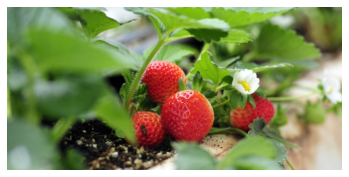

In [45]:
plt.imshow(img_str)
plt.axis("off")
plt.show()

In [46]:
img_array = preprocess_input(get_norm_img_array(img_str, size=img_size))

In [47]:
preds = model.predict(img_array)
# 이미지 예측
print("Predicted:", decode_predictions(preds, top=1)[0])

Predicted: [('n07745940', 'strawberry', 10.158948)]


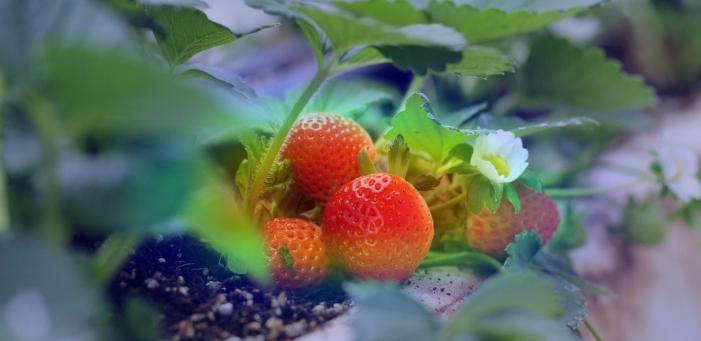

In [48]:
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)
save_and_display_gradcam_norm(img_str, heatmap)

## 반도체 공정 이미지 적용

In [49]:
import os

In [50]:
groups_folder_path = '/content/drive/MyDrive/CDS2(2022-2)/SEM_Dataset/RE_IPTCL_CELL_TRAIN/'
# 각 image가 존재하는 주소
categories = ['01_SPOT','20_LSAC','23_RING']
# 각 image의 종류
num_classes = len(categories)
# 전체 종류의 갯수

In [51]:
Y = []
X = []
for idex, category in enumerate(categories):
    # 위에서 지정한 categories를 index와 함께 가져온다.
    label = [0 for i in range(num_classes)]
    # categories의 갯수만큼 0을 채운 label list를 만든다.
    label[idex] = 1
    # 해당 index의 label만 1로 채운다 : one-hot encoding
  
    image_dir = groups_folder_path + category + '/'
    # 해당하는 이미지 경로
  
    for top, dir, f in os.walk(image_dir):
        for filename in f:
        # 이미지 명
 #           print(image_dir+filename)
            url = image_dir+filename
            # 경로 + 해당 이미지
            img = cv2.imread(url)
            X.append(img)
            Y.append(label)

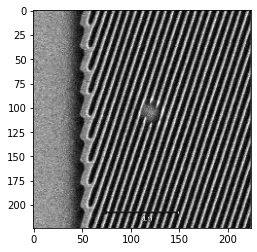

In [52]:
plt.imshow(X[0])

In [53]:
X = np.array(X)
Y = np.array(Y)

In [54]:
from sklearn.model_selection import train_test_split
tr_images, val_images, tr_oh_labels, val_oh_labels = train_test_split(X, Y, test_size=0.30, random_state=42)

In [55]:
print(tr_images.shape, tr_oh_labels.shape, val_images.shape, val_oh_labels.shape)

(562, 224, 224, 3) (562, 3) (242, 224, 224, 3) (242, 3)


In [56]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(rescale=1/255.0)
# rescale만 적용
valid_generator = ImageDataGenerator(rescale=1/255.0)

In [57]:
BATCH_SIZE = 8

In [58]:
flow_tr_gen = train_generator.flow(tr_images, tr_oh_labels, batch_size=BATCH_SIZE, shuffle=True)

* 위에서는 imagenet으로 pretrained된 가중치를 그대로 사용하였는데, 반도체 데이터는 없기에 새로 학습해야한다.

In [59]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam , RMSprop 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint , LearningRateScheduler

base_model = Xception(input_shape=(299, 299, 3), include_top=False) # weights='imagenet'
bm_output = base_model.output

x = GlobalAveragePooling2D()(bm_output)
x = Dropout(rate=0.5)(x)
x = Dense(200, activation='relu', name='fc1')(x)
x = Dropout(rate=0.5)(x)
output = Dense(3, activation='softmax', name='output')(x)
# 최종 출력은 우리가 구분하려는 class의 갯수와 같아야한다. 

model = Model(inputs=base_model.input, outputs=output)
model.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 149, 149, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 149, 149, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                           

In [60]:
fine_tune_at = -5
for layer in model.layers[:fine_tune_at]:
    layer.trainable =  False

In [61]:
import pandas as pd
display_layers = [(layer, layer.name, layer.trainable) for layer in model.layers]

pd.DataFrame(display_layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at...,input_2,False
1,<keras.layers.convolutional.Conv2D object at 0...,block1_conv1,False
2,<keras.layers.normalization.batch_normalizatio...,block1_conv1_bn,False
3,<keras.layers.core.activation.Activation objec...,block1_conv1_act,False
4,<keras.layers.convolutional.Conv2D object at 0...,block1_conv2,False
...,...,...,...
132,<keras.layers.pooling.GlobalAveragePooling2D o...,global_average_pooling2d,True
133,<keras.layers.core.dropout.Dropout object at 0...,dropout,True
134,<keras.layers.core.dense.Dense object at 0x7f4...,fc1,True
135,<keras.layers.core.dropout.Dropout object at 0...,dropout_1,True


In [62]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [63]:
tr_data_len = tr_images.shape[0]
val_data_len = val_images.shape[0]
history = model.fit(flow_tr_gen, epochs=40, 
                    batch_size=BATCH_SIZE)

Epoch 1/40
71/71 [==============================] - 5s 33ms/step - loss: 0.9496 - accuracy: 0.5534
Epoch 2/40
71/71 [==============================] - 2s 31ms/step - loss: 0.6027 - accuracy: 0.7580
Epoch 3/40
25/71 [=========>....................] - ETA: 1s - loss: 0.5322 - accuracy: 0.7750

KeyboardInterrupt: ignored

In [ ]:
def get_norm_img_array(img, size):
    img = cv2.resize(img, dsize=size)
    # 입력한 이미지를 정해진 사이즈로 변경 299x299
    array = keras.preprocessing.image.img_to_array(img)
    array = np.expand_dims(array, axis=0)
    # 한장의 이미지도 batch로 입력해야하기에 (1, 299, 299, 3)으로 차원 변경
    return array

In [ ]:
def save_and_display_gradcam_norm(img, heatmap, cam_path="cam.jpg", alpha=0.4):
    img = keras.preprocessing.image.img_to_array(img)
    # 입력한 이미지를 load

    heatmap = np.uint8(255 * heatmap)
    # heatmap의 크기를 조정

    jet = cm.get_cmap("jet")
    # jet colorize heatmap 사용

    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]
    # RGB로 사용

    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    # image를 RGB
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    # 사이즈
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)
    # RGB + 사이즈 조정하여 다시 이미지 preprocessing 정의

    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)
    # aplph의 값을 곱하여 이미지를 더함.

    superimposed_img.save(cam_path)
    # 이미지 저장경로

    display(Image(cam_path))
    # 이미지 시각화

In [ ]:
img1 = X[10]

In [ ]:
img_array = preprocess_input(get_norm_img_array(img1, size=(299, 299)))
preds = model.predict(img_array)
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)
save_and_display_gradcam_norm(img1, heatmap)

In [ ]:
img2 = X[45]
img_array = preprocess_input(get_norm_img_array(img2, size=(299, 299)))
preds = model.predict(img_array)
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)
save_and_display_gradcam_norm(img2, heatmap)

In [ ]:
img3 = X[67]
img_array = preprocess_input(get_norm_img_array(img3, size=(299, 299)))
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)
save_and_display_gradcam_norm(img3, heatmap)

In [ ]:
img4 = X[803]
img_array = preprocess_input(get_norm_img_array(img4, size=(299, 299)))
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)
save_and_display_gradcam_norm(img4, heatmap)

In [ ]:
img5 = X[403]
img_array = preprocess_input(get_norm_img_array(img5, size=(299, 299)))
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)
save_and_display_gradcam_norm(img5, heatmap)

In [ ]:
img6 = X[303]
img_array = preprocess_input(get_norm_img_array(img6, size=(299, 299)))
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)
save_and_display_gradcam_norm(img6, heatmap)

In [ ]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def show_image(image):
    plt.figure(figsize=(8, 8))
    plt.imshow(image)
    plt.axis('off')

In [ ]:
#좌우 이동
data_generator = ImageDataGenerator(width_shift_range=0.8, fill_mode='nearest')
image_batch = np.expand_dims(img6, axis=0)
data_generator.fit(image_batch)
data_gen_iter = data_generator.flow(image_batch)
aug_image_batch = next(data_gen_iter)
aug_image = np.squeeze(aug_image_batch)

In [ ]:
aug_image = aug_image.astype('int')
show_image(aug_image)

In [ ]:
aug_image = aug_image.astype('float32') 
img_array = preprocess_input(get_norm_img_array(aug_image, size=(299, 299)))
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)
save_and_display_gradcam_norm(aug_image, heatmap)

In [ ]:
#좌우 이동
data_generator = ImageDataGenerator(width_shift_range=0.6, fill_mode='nearest')
image_batch = np.expand_dims(img6, axis=0)
data_generator.fit(image_batch)
data_gen_iter = data_generator.flow(image_batch)
aug_image_batch = next(data_gen_iter)
aug_image = np.squeeze(aug_image_batch)

In [ ]:
aug_image = aug_image.astype('int')
show_image(aug_image)

In [ ]:
aug_image = aug_image.astype('float32') 
img_array = preprocess_input(get_norm_img_array(aug_image, size=(299, 299)))
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)
save_and_display_gradcam_norm(aug_image, heatmap)